In [1166]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
warnings.filterwarnings(module='seaborn*', action='ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import  norm
% matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR,LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import validation_curve

In [1167]:
path=r'C:\Users\kkluc\Python Code\Kaggle\House Price Code'
train=pd.read_csv('%s/%s'%(path,'train.csv'),index_col='Id')
test=pd.read_csv('%s/%s'%(path,'test.csv'),index_col='Id')

In [1168]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [1169]:
train.shape

(1460, 80)

Text(0,0.5,'SalePrice')

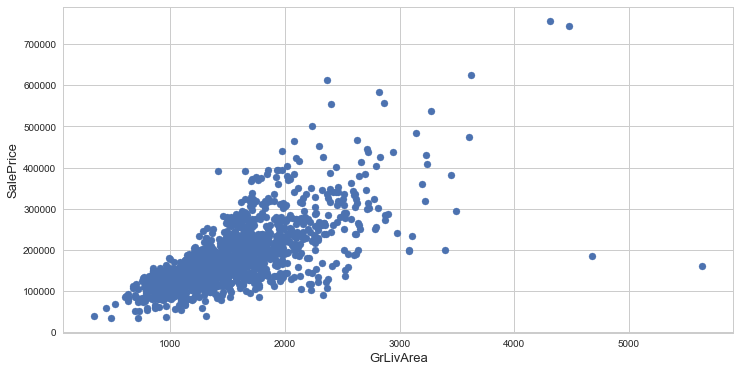

In [1170]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)


In [1171]:
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index,inplace=True)

In [1172]:
train.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=1458)

In [1173]:
test.index


Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [1174]:
print("数值型")
print(train.select_dtypes(include=[np.number]).columns)
print(len(train.select_dtypes(include=[np.number]).columns))
print('_'*70)
print("字符型")
print(train.select_dtypes(include=[np.object]).columns)
print(len(train.select_dtypes(include=[np.object]).columns))

数值型
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
37
______________________________________________________________________
字符型
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'Bs

In [1175]:
#for j,data in zip(['train','test'],[train,test])
def isnull():
    for j,data in zip(['train','test'],[train,test]):
        print(j)

        null=pd.DataFrame({'columns':data.columns,'null_values':data.isnull().sum(),'bili':data.isnull().sum()/len(data)},columns=['columns','null_values','bili'])
        null=null[null['null_values']>0]
        print(null.sort_values('null_values',ascending=False))
        print('_'*50)
        print(null.index)


In [1176]:
isnull()

train
                   columns  null_values      bili
PoolQC              PoolQC         1452  0.995885
MiscFeature    MiscFeature         1404  0.962963
Alley                Alley         1367  0.937586
Fence                Fence         1177  0.807270
FireplaceQu    FireplaceQu          690  0.473251
LotFrontage    LotFrontage          259  0.177641
GarageType      GarageType           81  0.055556
GarageYrBlt    GarageYrBlt           81  0.055556
GarageFinish  GarageFinish           81  0.055556
GarageQual      GarageQual           81  0.055556
GarageCond      GarageCond           81  0.055556
BsmtExposure  BsmtExposure           38  0.026063
BsmtFinType2  BsmtFinType2           38  0.026063
BsmtFinType1  BsmtFinType1           37  0.025377
BsmtCond          BsmtCond           37  0.025377
BsmtQual          BsmtQual           37  0.025377
MasVnrArea      MasVnrArea            8  0.005487
MasVnrType      MasVnrType            8  0.005487
Electrical      Electrical            1  0.0

In [1177]:
train.describe().round(2).T #只针对数字型数据

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1458.0,56.89,42.33,20.0,20.00,50.0,70.00,190.0
LotFrontage,1199.0,69.80,23.20,21.0,59.00,69.0,80.00,313.0
LotArea,1458.0,10459.94,9859.20,1300.0,7544.50,9475.0,11600.00,215245.0
OverallQual,1458.0,6.09,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1458.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1458.0,1971.22,30.19,1872.0,1954.00,1972.5,2000.00,2010.0
YearRemodAdd,1458.0,1984.83,20.64,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1450.0,102.75,179.44,0.0,0.00,0.0,164.75,1600.0
BsmtFinSF1,1458.0,438.83,432.97,0.0,0.00,382.0,711.00,2188.0
BsmtFinSF2,1458.0,46.61,161.42,0.0,0.00,0.0,0.00,1474.0


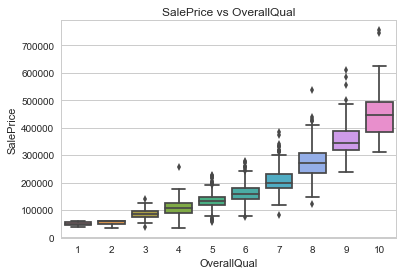

In [1178]:
#OverallQual整体房子质量
sns.set_style("whitegrid")
sns.boxplot('OverallQual','SalePrice',data=train)
plt.title("SalePrice vs OverallQual")
plt.show()

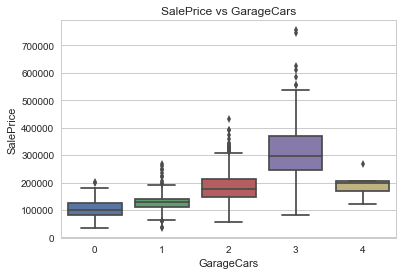

In [1179]:
#GarageCars车库车位数
sns.set_style("whitegrid")
sns.boxplot('GarageCars','SalePrice',data=train)
plt.title("SalePrice vs GarageCars")
plt.show()

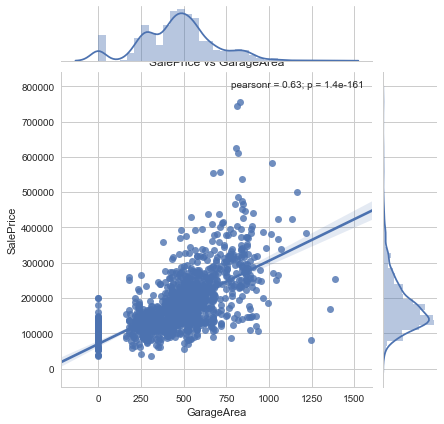

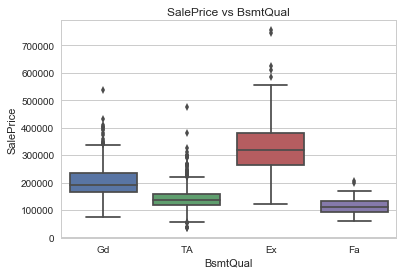

In [1180]:
#0代表没有车库，车库面积
sns.set_style("whitegrid")
sns.jointplot('GarageArea','SalePrice',data=train,kind='reg')
plt.title("SalePrice vs GarageArea")
plt.show() 

#BsmtQual地下室高度，0 代表没有地下室
sns.set_style("whitegrid")
sns.boxplot('BsmtQual','SalePrice',data=train)
plt.title("SalePrice vs BsmtQual")
plt.show() 



In [1181]:
def kk(x):
    print('isnull num')
    print(x.isnull().sum())
    print('_'*20)
    print(x.value_counts())
    

In [1182]:
kk(test.Exterior2nd)

isnull num
1
____________________
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64


In [1183]:
k=train.groupby('Neighborhood')[['SalePrice']].agg(['mean','count','median'])
k.columns=[1,2,3]
k.sort_values(3)

,1,2,3
Neighborhood,,,
MeadowV,98576.470588,17,88000
IDOTRR,100123.783784,37,103000
BrDale,104493.750000,16,106000
OldTown,128225.300885,113,119000
Edwards,127318.571429,98,119500
BrkSide,124834.051724,58,124300
Sawyer,136793.135135,74,135000
Blueste,137500.000000,2,137500
SWISU,142591.360000,25,139500


In [1184]:
kk(test.YrSold)

isnull num
0
____________________
2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64


In [1185]:
for data in [train,test]:
    #MSSUBClass 表示出售中设计的住宅类型，为分类变量，object
    #data['MSSubClass']=data.MSSubClass.apply(lambda x:1 if x in [20,30,40,45,50,120,150] else 2 if x in [60,70,75,160,190] else 3)
    data['MSSubClass']=data.MSSubClass.astype(str)
    data['MSSubClass_New'] = data.MSSubClass.map({'90':1, 
                                        '190':1, '75':1, 
                                        '50':2, '70':2,  
                                        '40':3, '160':3, '30':3, 
                                        '60':4, '45':4, '80':4, '180':5, '20':5,
                                        '120': 6, '85':6}) #根据MSSubClass创建新字段MSSubClass_new
    
    #MSZoning 住宅地理位置，因为RL 属于居多，因此只考虑是否是RL
    data['MSZoning'].fillna(data['MSZoning'].mode()[0],inplace=True)
    data['MSZoning']=data.MSZoning.replace({'RL':1,'RM':2,'FV':3,'C (all)':4,'RH':2})
    #data.MSZoning.astype('object')
    
    #LotFrontage 与房屋相连的街道尺寸的填充
    #mean=data.loc[data.LotFrontage.notnull(),'LotFrontage'].mean()
    #std=data.loc[data.LotFrontage.notnull(),'LotFrontage'].std()
    #count=data.LotFrontage.isnull().sum()
    #data.loc[data.LotFrontage.isnull(),'LotFrontage']=np.random.randint(mean-std,mean+std,size=count)
    data.drop('LotFrontage',axis=1,inplace=True)
    #data['LotFrontage']=data.groupby('LotArea')['LotFrontage'].apply(lambda x:x.fillna(x.median()))
    #transformation能返回完整数据的某一变换版本供我们重组
    
    #LotArea 土地面积，无缺失值，数值，保留,分割
    #data['LotArea']=np.log1p(data.LotArea)
    #data['LotAreaQcut']=pd.qcut(data.LotArea,q=10,labels=[0,1,2,3,4,5,6,7,8,9])
    #data['LotAreaQcut'].astype('object')
    #Street 街道类型
    data['Street']=data.Street.replace({'Pave': 1, 'Grvl': 0})
    #但Alley街道类型可能影响价格,创建新字段为是否有alley
    data['alley']=0
    data.loc[data.Alley.isnull(),'alley']=1
    data.drop('Alley',axis=1,inplace=True)
    #data['Alley'].astype('object')
    
    #LotShape 大致形状，使用分类为0，1
    data['LotShape']=data.LotShape.replace({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
    #data['LotShape'].astype('object')
    
    # LandContour平坦度
    data['LandContour']=data.LandContour.replace({'Lvl':0,'HLS':1,'Bnk':2,'Low':3})

    #Utilities 该特征基本上都是AllPUB,所以影响不大，删除
    data.drop('Utilities',axis=1,inplace=True)
    
    #LotConfige 街道位置,
    data['LotConfig']=data.LotConfig.replace({'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5})
    #LandSlope 倾斜度，删除
    data['LandSlope']=data.LandSlope.replace({'Gtl':1,'Mod':2,'Sev':3})
    #Neighorhood 城市中的地理位置，进行编码，在后面修改
    data["Neighborhood"] = data.Neighborhood.map({'MeadowV':0,
                                               'IDOTRR':1, 'BrDale':1,
                                               'OldTown':1, 'Edwards':1, 'BrkSide':1,
                                               'Sawyer':1, 'Blueste':1, 'SWISU':2, 'NAmes':2,
                                               'NPkVill':2, 'Mitchel':2,
                                               'SawyerW':2, 'Gilbert':2, 'NWAmes':2,
                                               'Blmngtn':2, 'CollgCr':2, 'ClearCr':3, 'Crawfor':3,
                                               'Veenker':3, 'Somerst':3, 'Timber':3,
                                               'StoneBr':4,
                                               'NoRidge':4, 'NridgHt':4}) #group by,查看SlaePrice


    #Condition1 Condition2优势条件1，2 Norm 是较多的，因此，考虑创建新的字段，即两个norma为2，一个norm为1，0个位0
    data["Condition1"] = data.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':2,
                                           'PosN':2, 'RRNe':2,
                                           'PosA':2 ,'RRNn':4})
    data.drop('Condition2',axis=1,inplace=True) #主要是normal ，删除
    #dara['Condition'].astype('object')
    
    #BldgType住宅类型，后面直接编码
    data['BldgType']=data.BldgType.replace({'1Fam':1,'TwnhsE':1,'2fmCon':0,'Duplex':0,'Twnhs':0})

    #HouseStyle 房屋风格，后续惊醒编码处理
    data['HouseStyle']=data.HouseStyle.map({'1.5Fin':0, '1.5Unf':2, '1Story':2, '2.5Fin':0, '2.5Unf':0, '2Story':1, 'SFoyer':2, 'SLvl':2})

    #OverallQual 房屋整体装修评分，重要，保留
    #OverallCond 房屋的整体状况，重要，保留
    
    # yearBuilt，YearRemodADD房屋建造日期和重新主修日期，保留
   
    # 删除'RoofStyle','RoofMatl','Exterior1st','Exterior2nd'不重要的
    data['RoofStyle']=data.RoofStyle.replace({'Flat':1, 'Gable':1, 'Gambrel':0, 'Hip':1, 'Mansard':0, 'Shed':1})
    
    data.drop(['RoofMatl'],axis=1,inplace=True)
    data['Exterior1st']=data.Exterior1st.replace({'AsphShn':0,'BrkComm':0,'CBlock':0,'AsbShng':0,
                                                 'Stucco':1,'Wd Sdng':1,
                                                 'MetalSd':2,'Stone':2,'WdShing':2,'Plywood':2,'HdBoard':2,'BrkFace':2,
                                                 'VinylSd':3,'CemntBd':3,'ImStucc':3})
    data['Exterior2nd'].fillna('Other',inplace=True)
    data['Exterior2nd']=data['Exterior2nd'].replace({'CBlock':1,'AsbShng':1,'Stone':1,'Stucco':1,
                                                    'Brk Cmn':2,'AsphShn':2,'Wd Sdng':2,'Wd Shng':2,
                                                    'MetalSd':3,'Plywood':3,'HdBoard':3,'BrkFace':3,
                                                    'VinylSd':4,'CmentBd':4,'ImStucc':4,'Other':4})


    #MasVnrType 墙面装饰,考虑是否有装修
    data.MasVnrType.fillna(data['MasVnrType'].mode()[0],inplace=True)
    data['MasVnrType']=data['MasVnrType'].apply(lambda x:0 if x=='None' else 1 if x=='BrkCmn' else 2 if x=='BrkFace' else 3)

    #MasVnrArea 墙面装饰面积，直接删除
    data.drop('MasVnrArea',axis=1,inplace=True)
    
    #ExterQual 外部材料质量，后面编码
    data['ExterQual']=data.ExterQual.map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
    #ExterCond 外部材料现状
    data['ExterCond']=data.ExterCond.map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
    #Foundation 地基材料直接删除
    data['Foundation']=data.Foundation.replace({'Slab':0,'BrkTil':1,'Stone':1,'Wood':1,'CBlock':2,'PConc':3})

    #data.Bsmt质量状态
    data.BsmtQual.fillna('None',inplace=True)
    data['BsmtQual']=data.BsmtQual.map({'Ex':3,'Gd':2,'TA':1,'Fa':0,'Po':0,'None':4})

    
    #地下室状态
    data['BsmtCond'].fillna('None',inplace=True)
    data['BsmtCond']=data.BsmtCond.map({'Ex':3,'Gd':3,'TA':2,'Fa':1,'Po':0,'None':4})

    #地下室透光性能 BsmtExposure
    data['BsmtExposure'].fillna('None',inplace=True)
    data['BsmtExposure']=data.BsmtExposure.replace({'No':0,'Mn':1,'Av':2,'Gd':3,'None':4})

              
    #BsmtFinType1 地下室区域评级
    data.BsmtFinType1.fillna(data.BsmtFinType1.mode()[0],inplace=True)
    data['BsmtFinType1']=data.BsmtFinType1.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1})
    
    
    #BsmtFinSF1 一类型面积的平方英尺
    data.BsmtFinSF1.fillna(int(data.BsmtFinSF1.mode()[0]),inplace=True)
    data['BsmtFinSF1_?']=data.BsmtFinSF1.apply(lambda x:0 if x==0 else 1) 
    data.drop('BsmtFinSF1',axis=1,inplace=True)
    #BsmtFinType2 地下室区域评级
    data.BsmtFinType2.fillna(data.BsmtFinType2.mode()[0],inplace=True)
    data['BsmtFinType2']=data.BsmtFinType2.map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0})
    
    #BsmtFinSF1 一类型面积的平方英尺
    data.BsmtFinSF2.fillna(int(data.BsmtFinSF2.mode()[0]),inplace=True)
    data['BsmtFinSF2_?']=data.BsmtFinSF2.apply(lambda x:0 if x==0 else 1) 
    data.drop('BsmtFinSF2',axis=1,inplace=True)
    #BsmtUnfSF 未完成平方英尺
    data.BsmtUnfSF.fillna(int(data.BsmtUnfSF.median()),inplace=True)
    data['BsmtUnfSF_?']=data.BsmtUnfSF.apply(lambda x:0 if x==0 else 1) 
    
    #TotalBsmtSF 地下室总面积填充
    data.TotalBsmtSF.fillna(int(data.TotalBsmtSF.mode()[0]),inplace=True)
    
    
    #Heating 加热类型
    data['Heating']=data.Heating.apply(lambda x:1 if x=='GasA' else 0)
    
    #HeatingQC 加热质量
    data.HeatingQC.replace({'Po':0,'Fa':1,'TA':0,'Gd':2,'Ex':3},inplace=True)
    
    #CentralAir 中央空调 转化为0，1
    data['CentralAir'].replace({'Y':1,'N':0},inplace=True)
    
    #Electrical 电气系统是否含有
    data.Electrical.fillna(data.Electrical.mode()[0],inplace=True)
    data['Electrical']=data.Electrical.replace({'Mix':0,'FuseP':0,'FuseF':1,'FuseA':2,'SBrkr':3})

    #1stFlrSF 1楼平方英寸，连续变量保留
    #2ndFlrSF 2楼平方英寸，连续变量保留
    data['2ndFlrSF']=data['2ndFlrSF'].apply(lambda x:0 if x==0 else 1)
    
    #LowQualFinSF 低质量完成的地板面积，分布不太均已，因此考虑转化为分类变量，即是否有低质量未完成的
    data['LowQualFinSF']=data.LowQualFinSF.apply(lambda x:0 if x==0 else 1)
    
    #GrlivArea 地上面积，连续变量，保持不变
       
    #BsmtFullBath 分布不均一，分为两类
    data.BsmtFullBath.fillna(0,inplace=True)
    data.BsmtFullBath.apply(lambda x:0 if x==0 else 1)
    
    
    #BsmtHalfBath  分为0，1
    data.BsmtHalfBath.fillna(0,inplace=True)
    data['BsmtHalfBath']=data.BsmtHalfBath.apply(lambda x:0 if x==0 else 1)
    
       
    
    #FullBath 完整浴室，分布不太均已，分为小于等于1和大于1;分类
    data['FullBath']=data.FullBath.apply(lambda x:0 if x<=1 else 1)
    
    
    #HalfBath 半浴室数量分布均已，保留
    data['HalfBath']=data.HalfBath.apply(lambda x:0 if x<1 else 1)
    # data.HalfBath.astype('object')
              
    #BedroomAbvGr 地上卧室数量
    data['BedroomAbvGr']=data.BedroomAbvGr.apply(lambda x:1 if x<2 else 2 if x==2 else 3 if x==3 else 4)
    # data.BedroomAbvGr.astype('object')
       
    #KitchenAbvGr 分布太不均已，起方很小，故舍去
    data.drop('KitchenAbvGr',axis=1,inplace=True)
    
    #KitchenQual 厨房质量的影响
    data.KitchenQual.fillna(data.KitchenQual.mode()[0],inplace=True)
    data.KitchenQual.replace({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},inplace=True)
    
    #TotRmsABVGrd 地上总房间数量,分布不均一，因此考虑转化为分类数据
    data['TotRmsAbvGrd']=data.TotRmsAbvGrd.apply(lambda x:0 if x<=4 else 1 if x==5 else 2 if x==6 else 3 if x==7 else 4)
        
    #Functional 家庭功能损坏情况
    data['Functional']=data.Functional.replace({'Typ':1,'Min2':2,'Min1':2,'Mod':2,'Maj1':3,'Maj2':3,'Sev':3})

    #Fireplaces 壁炉数量，因为大部分为0和1，少部分大于1的，转化为2
    data['Fireplaces']=data.Fireplaces.apply(lambda x:2 if x>1 else 1 if x==1 else 0)
    
    #FirePlaceQu 壁炉质量，由于壁炉质量缺失值占比不是很大，因此不能舍去
    data['FireplaceQu'].fillna('None',inplace=True)
    data['FireplaceQu'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0,'None':5},inplace=True)
        
    
    #Garage type车库位置，缺失值也不多，考虑采用Na表示没有
    data['GarageType'].fillna('None',inplace=True)
    data['GarageType'].replace({ '2Types':1, 'BuiltIn':4, 'Detchd':3, 'Attchd':5, 'Basment':2, 'CarPort':1,'None':6},inplace=True)

    
    #garageyrblt 车库建造年份，虽然缺失值不多，但认为实际中不是很关心的，所以选择删除
    data.drop('GarageYrBlt',axis=1,inplace=True)
    
    #GarageFinish 车库完成度，感觉不是很重要的，但由于数据完整，考虑保留
    data['GarageFinish'].fillna('None',inplace=True)
    data.GarageFinish.replace({'RFn':2, 'Unf':1, 'Fin':3,'None':0},inplace=True)
    
    #GarageCars 车库容量，数值型
    data['GarageCars'].fillna(0,inplace=True)
    #GarageArea车库面积，测试集缺少的值为无车库，即为0
    data['GarageArea'].fillna(0,inplace=True)
    #GarageQual车库质量
    data.GarageQual.fillna('None',inplace=True)
    data['GarageQual'].replace({ 'Po':1, 'Fa':2, 'Ex':3, 'Gd':4, 'TA':3,'None':0},inplace=True)

    #GarageCond 车库条件
    data.GarageCond.fillna('None',inplace=True)
    data['GarageCond'].replace({ 'Po':1, 'Fa':2, 'Ex':3, 'Gd':4, 'TA':3,'None':0},inplace=True)
    
    #PaveedDrive 没有缺失值，'N', 'P', 'Y'
    data.PavedDrive.replace({'N':0,'P':1,'Y':2},inplace=True)

    #'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch'这些不知道是啥，删除
    data.drop(['WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch'],axis=1,inplace=True)
    data["YearsSinceRemodel"] = data["YrSold"] - data["YearRemodAdd"]
    data.drop('YearRemodAdd',axis=1,inplace=True)

    
    # 由于某些值缺失过大，直接舍去,大部分的没有Pool，因此，可考虑把PoolQC与PoolArea舍去，
    #取而代之的是增加新的特征，表示是否有Pool
    # data['have_pool']=0
    # data.loc[data.PoolQC.notnull(),'have_pool']=1
    # data.drop(['PoolQC','PoolArea'],axis=1,inplace=True)
    
    # 未被其他类型覆盖 和篱笆质量缺失值多，而且重要等级少，
    
    data.drop(['MiscFeature','Fence'],axis=1,inplace=True)
    
    #Miscval 杂项功能的价值,由于大部分均为0，因此考虑变为0，1
    data['MiscVal']=data.MiscVal.apply(lambda x:0 if x==0 else 1)
              
    #saleType 销售类型，直接删除
    data.SaleType.fillna(data.SaleType.mode()[0],inplace=True)
    data['SaleType']=data.SaleType.replace({'ConLw':0,'ConLI':0,'COD':1,'ConLD':1,'Oth':1,'WD':2,'CWD':2,'New':3,'Con':3})

    #salecondition 销售条件的影响，氛围正常和非正常
    data['SaleCondition']=data.SaleCondition.replace({'Alloca':0,'AdjLand':0,'Abnorml':1,'Family':1,'Normal':2,'Partial':3})

    #Mosold Yrsold 销售日期，保留
        


In [1186]:
columns=[x for x in train.columns if x not in ['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                                               'TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','SalePrice']]

In [1187]:
columns

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'MSSubClass_New',
 'alley',
 'BsmtFinSF1_?',
 'BsmtFinSF2_?',
 'BsmtUnfSF_?',
 'YearsSinceRemodel']

In [1188]:
for i in columns:
    print(train[i].name)
    print(set(train[i]))
    print('_'*20)

MSSubClass
{'75', '45', '120', '50', '160', '180', '20', '40', '70', '90', '85', '190', '30', '60', '80'}
____________________
MSZoning
{1, 2, 3, 4}
____________________
Street
{0, 1}
____________________
LotShape
{0, 1, 2, 3}
____________________
LandContour
{0, 1, 2, 3}
____________________
LotConfig
{1, 2, 3, 4, 5}
____________________
LandSlope
{1, 2, 3}
____________________
Neighborhood
{0, 1, 2, 3, 4}
____________________
Condition1
{1, 2, 3, 4}
____________________
BldgType
{0, 1}
____________________
HouseStyle
{0, 1, 2}
____________________
OverallQual
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
____________________
OverallCond
{1, 2, 3, 4, 5, 6, 7, 8, 9}
____________________
YearBuilt
{1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1

In [1189]:
full=pd.concat([train,test],axis=0)
for i in columns:
    full[i]=full[i].astype(str)
    dummy=pd.get_dummies(full[i],prefix=i+'_')
    full=pd.concat([full,dummy],axis=1)
    full.drop(i,axis=1,inplace=True)


In [1190]:
train=full.loc[:len(train)]


In [1191]:
train.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458],
           dtype='int64', name='Id', length=1456)

In [1192]:
train.shape

(1456, 454)

In [1193]:
test=full.loc[len(train)+5:]
test.drop('SalePrice',axis=1,inplace=True)

In [1194]:
test.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [1195]:
test.shape

(1459, 453)

In [1196]:
def null_info():
    for j,data in (['train',train],['test',test]):
        print(j)

        m=pd.DataFrame({'columns':data.columns,'null values':data.isnull().sum(),'bili':data.isnull().sum()/len(data)},columns=['columns','null values','bili'])
        m=m[m['null values']>0]
        print(m.sort_values('null values',ascending=False))
        print('_'*50)
        print(m.index)
null_info()

train
Empty DataFrame
Columns: [columns, null values, bili]
Index: []
__________________________________________________
Index([], dtype='object')
test
Empty DataFrame
Columns: [columns, null values, bili]
Index: []
__________________________________________________
Index([], dtype='object')


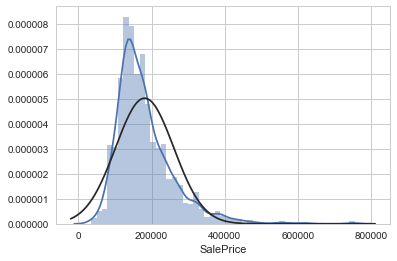

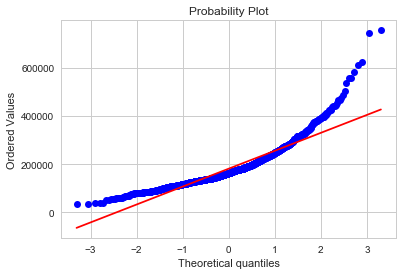

In [1197]:
from scipy import  stats
sns.distplot(train.SalePrice,fit=norm)
plt.show()

stats.probplot(train.SalePrice,plot=plt)
plt.show()

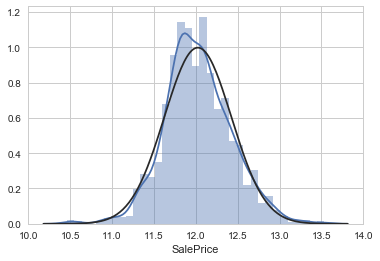

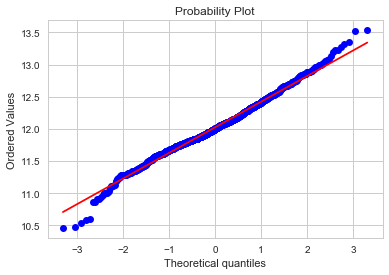

In [1198]:
#将train的值转化为正太分布，最后预测也需要转回来 切记
train['SalePrice']=np.log(train.SalePrice)
sns.distplot(train.SalePrice,fit=norm)
plt.show()

stats.probplot(train.SalePrice,plot=plt)
plt.show()

GriLivArea


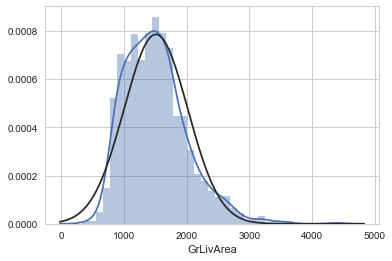

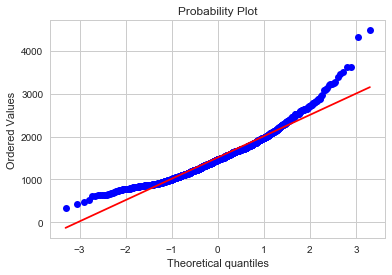

______________________________
log(GriLivArea)


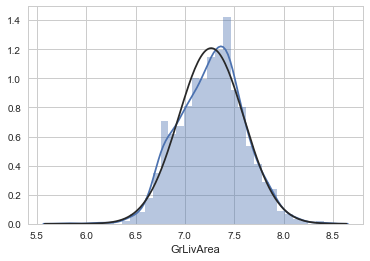

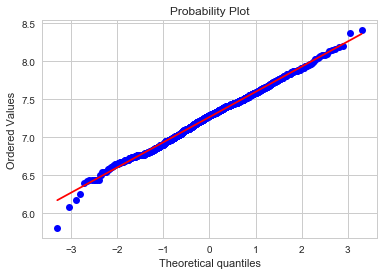

______________________________
SalePrice vs GrLivArea


<Figure size 1080x720 with 0 Axes>

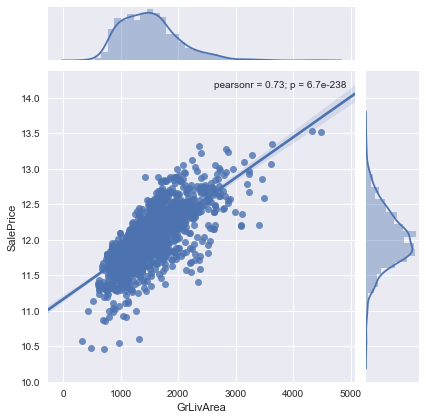

In [1199]:
from scipy import  stats
print('GriLivArea')
sns.distplot(train.GrLivArea,fit=norm)

        
plt.show()

stats.probplot(train.GrLivArea,plot=plt)
plt.show()
print('_'*30)
print('log(GriLivArea)')
from scipy import  stats
sns.distplot(np.log(train.GrLivArea),fit=norm)
plt.show()

stats.probplot(np.log(train.GrLivArea),plot=plt)
plt.show()
print('_'*30)
print('SalePrice vs GrLivArea')
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.jointplot('GrLivArea','SalePrice',data=train,kind='reg')
plt.show()

In [1200]:
train['GrLivArea']=np.log(train.GrLivArea)
test['GrLivArea']=np.log(test.GrLivArea)

SalePrice vs GarageArea


<Figure size 1080x720 with 0 Axes>

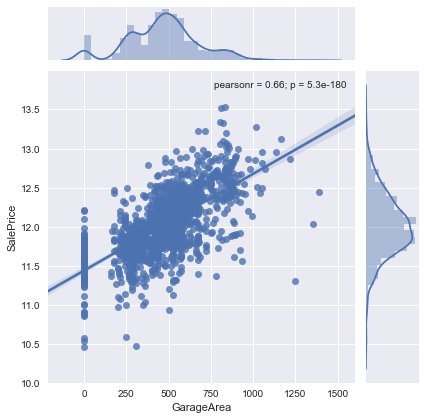

In [1201]:
from scipy import  stats

print('SalePrice vs GarageArea')
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.jointplot('GarageArea','SalePrice',data=train,kind='reg')
plt.show()

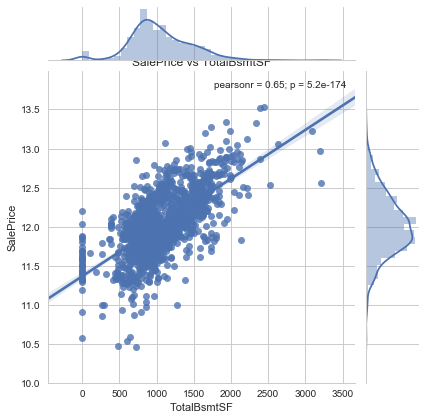

In [1202]:
#TotalBsmtSF地下室的面积
sns.set_style("whitegrid")
sns.jointplot('TotalBsmtSF','SalePrice',data=train,kind='reg')
plt.title("SalePrice vs TotalBsmtSF")
plt.show() 

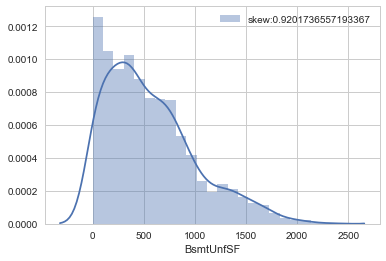

In [1203]:
#w未完工地下室面积BsmtUnfSF 与总的地下室面积TotalBsmtSF: 考虑是否可以创建新的特征
sns.distplot(train.BsmtUnfSF,label="skew:%s"%train.BsmtUnfSF.skew())
plt.legend()
plt.show()

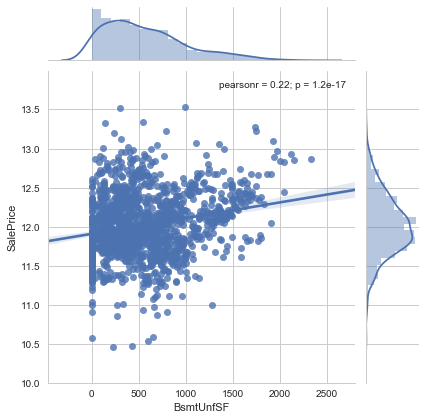

In [1204]:
#BsmtUnfSF 未完工面积影响，好像月没有完成，期价格越高 奇怪
sns.jointplot('BsmtUnfSF','SalePrice',data=train,kind='reg')
plt.show()


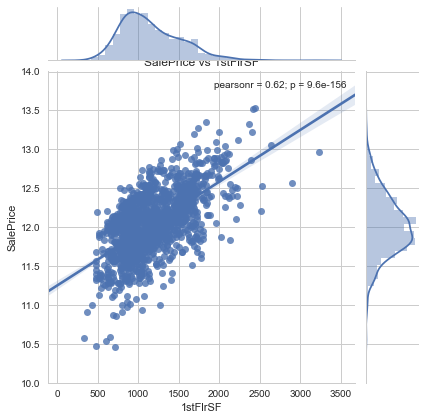

In [1205]:
#1stFlrSF 一楼平方英尺
sns.set_style("whitegrid")
sns.jointplot('1stFlrSF','SalePrice',data=train,kind='reg')
plt.title("SalePrice vs 1stFlrSF")
plt.show()

In [1206]:
train['1stFlrSF']=np.log(train['1stFlrSF'])
test['1stFlrSF']=np.log(test['1stFlrSF'])

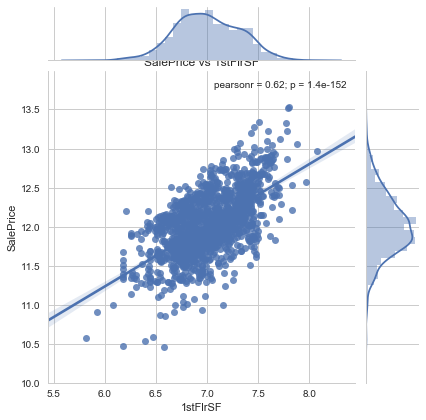

In [1207]:
sns.set_style("whitegrid")
sns.jointplot('1stFlrSF','SalePrice',data=train,kind='reg')
plt.title("SalePrice vs 1stFlrSF")
plt.show()

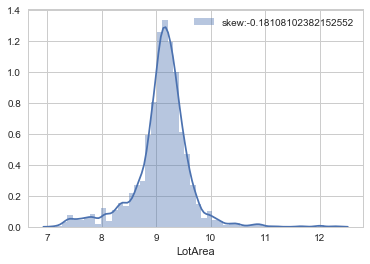

In [1208]:
# 因为LotAREA的分布严重不均匀 因此考虑将其转化
for data in [train,test]:
    data['LotArea']=np.log(data['LotArea'])
sns.distplot(train.LotArea,label="skew:%s"%train.LotArea.skew())
plt.legend()
plt.show()

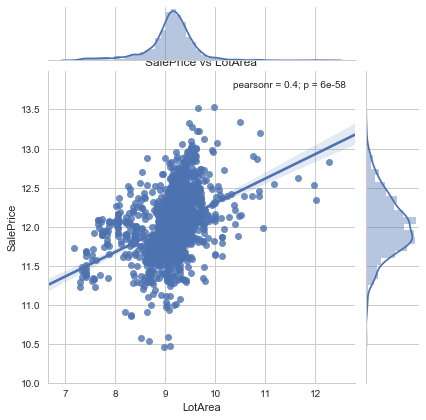

In [1209]:
# LotArea 土地面积 特征
sns.set_style("whitegrid")
sns.jointplot('LotArea','SalePrice',data=train,kind='reg')
plt.title("SalePrice vs LotArea")
plt.show()  

In [1210]:
# 'BsmtUnfSF',Unfinished square feet of basement area
#LotFrontage: Linear feet of street connected to property
#LotArea: Lot size in square feet
#BsmtFinSF1: Type 1 finished square feet
#BsmtFinSF2: Type 2 finished square feet
#TotalBsmtSF: Total square feet of basement area
#1stFlrSF: First Floor square feet
#2ndFlrSF: Second floor square feet
#GrLivArea: Above grade (ground) living area square fee
#GarageArea: Size of garage in square feet

In [1211]:
for i in train.columns:
    print(train[i].name)
    print(set(train[i]))
    print('_'*50)
    
    
   

1stFlrSF
{5.811140992976701, 6.762729506931879, 7.132497551660044, 7.275172319452771, 6.525029657843462, 7.04141166379481, 6.659293919683638, 7.222566018822171, 6.8679744089702925, 7.05444965813294, 7.309212365692763, 7.133295954896068, 8.07961802938984, 6.663132695990803, 7.270312886079025, 6.967909201801884, 6.85751406254539, 6.974478911025045, 6.903747257584598, 6.626717749249025, 7.642044402873258, 6.77078942390898, 7.442492722794441, 7.273786317844895, 7.062191632286556, 7.130098510125578, 7.2078598714324755, 7.2305631534092925, 7.457609289715606, 7.194436851100335, 7.066466970136958, 7.237059026124737, 7.406103381237015, 7.207118856207756, 6.786716950605081, 6.892641641172089, 7.317212408359839, 7.396335293800808, 7.327123292259293, 7.1316985104669115, 7.005789019253503, 7.142827401161621, 6.740519359606223, 6.784457062637643, 6.843749949006225, 6.74993119378857, 6.870053411798126, 6.744059186311348, 7.129297548929373, 7.215239978730097, 7.101675971619444, 7.360103972989152, 7.07

{0, 1}
__________________________________________________
YearsSinceRemodel__60
{0, 1}
__________________________________________________
YearsSinceRemodel__7
{0, 1}
__________________________________________________
YearsSinceRemodel__8
{0, 1}
__________________________________________________
YearsSinceRemodel__9
{0, 1}
__________________________________________________


TotalBsmtSF
0.512538048743228


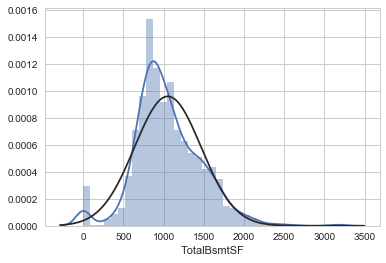

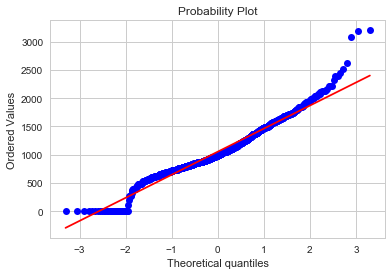

LotArea
-0.18108102382152552


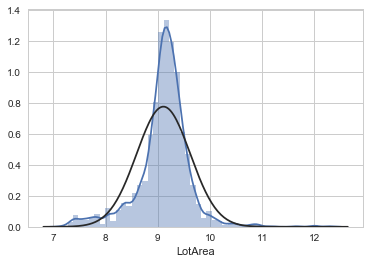

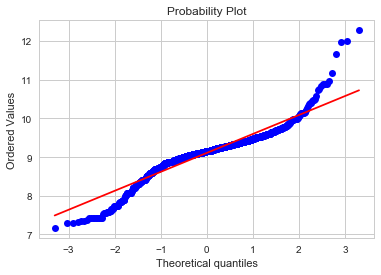

GrLivArea
-0.07394232045979669


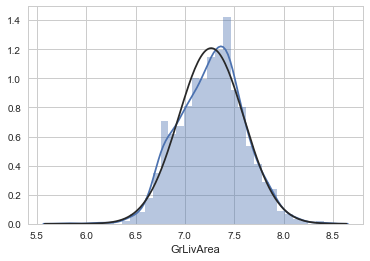

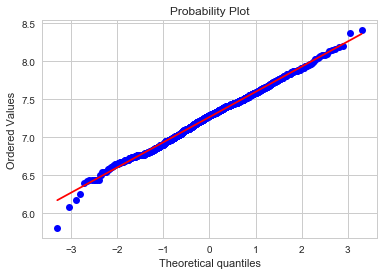

GarageArea
0.12921651920400093


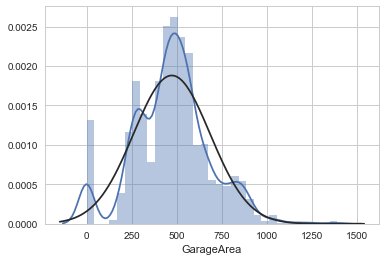

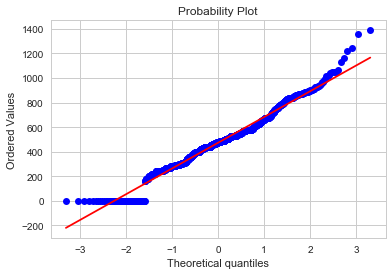

BsmtUnfSF
0.9201736557193367


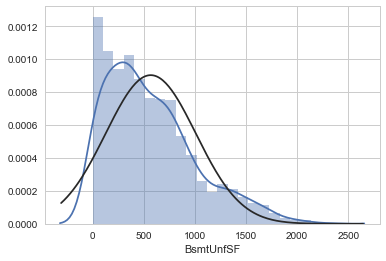

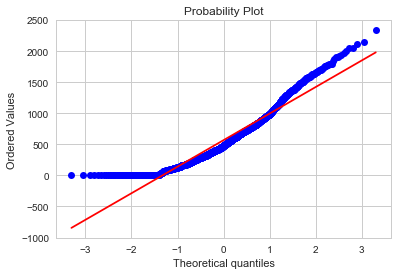

1stFlrSF
0.006750863795579371


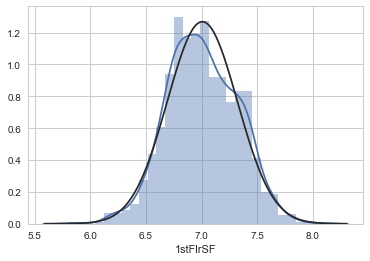

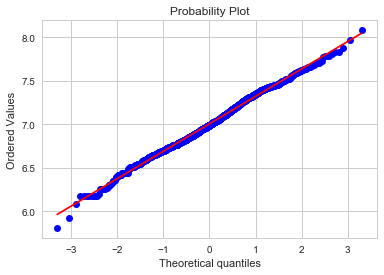

In [1212]:

from scipy import  stats
for i in ['TotalBsmtSF','LotArea','GrLivArea','GarageArea','BsmtUnfSF','1stFlrSF']:
    print(i)
    print(train[i].skew())
    sns.distplot(train[i],fit=norm)


    plt.show()

    stats.probplot(train[i],plot=plt)
    plt.show()

# 获取相关性top15de值

In [1213]:
train.shape

(1456, 454)

In [1214]:
test.shape

(1459, 453)

In [1215]:
train[['TotalBsmtSF','LotArea','GrLivArea','GarageArea','BsmtUnfSF','1stFlrSF']].head()

,TotalBsmtSF,LotArea,GrLivArea,GarageArea,BsmtUnfSF,1stFlrSF
Id,,,,,,
1,856.0,9.041922,7.444249,548.0,150.0,6.752270
2,1262.0,9.169518,7.140453,460.0,284.0,7.140453
3,920.0,9.328123,7.487734,608.0,434.0,6.824374
4,756.0,9.164296,7.448334,642.0,540.0,6.867974
5,1145.0,9.565214,7.695303,836.0,490.0,7.043160


In [1216]:
train[['TotalBsmtSF','LotArea','GrLivArea','GarageArea','BsmtUnfSF','1stFlrSF']].corr()

,TotalBsmtSF,LotArea,GrLivArea,GarageArea,BsmtUnfSF,1stFlrSF
TotalBsmtSF,1.000000,0.333281,0.419112,0.475801,0.439791,0.783833
LotArea,0.333281,1.000000,0.374727,0.312141,0.077385,0.457664
GrLivArea,0.419112,0.374727,1.000000,0.467049,0.269231,0.536643
GarageArea,0.475801,0.312141,0.467049,1.000000,0.183290,0.477445
BsmtUnfSF,0.439791,0.077385,0.269231,0.183290,1.000000,0.322056
1stFlrSF,0.783833,0.457664,0.536643,0.477445,0.322056,1.000000


In [1217]:
test[['TotalBsmtSF','LotArea','GrLivArea','GarageArea','BsmtUnfSF','1stFlrSF']].head()

,TotalBsmtSF,LotArea,GrLivArea,GarageArea,BsmtUnfSF,1stFlrSF
Id,,,,,,
1461,882.0,9.360655,6.797940,730.0,270.0,6.797940
1462,1329.0,9.565704,7.192182,312.0,406.0,7.192182
1463,928.0,9.534595,7.395722,482.0,137.0,6.833032
1464,926.0,9.208138,7.380256,470.0,324.0,6.830874
1465,1280.0,8.518193,7.154615,506.0,1017.0,7.154615


In [1218]:
from sklearn.preprocessing import StandardScaler
for i in ['TotalBsmtSF','LotArea','GrLivArea','GarageArea','BsmtUnfSF','1stFlrSF']:
    std=StandardScaler()
    std=std.fit(train[i].values.reshape(-1,1))
    train[i]=std.transform(train[i].values.reshape(-1,1))
    test[i]=std.transform(test[i].values.reshape(-1,1))

# 划分测试集、验证机、训练集

In [1219]:
train_x=train.drop('SalePrice',axis=1)
train_y=train.SalePrice
test_x=test

In [1220]:
train_x.shape

(1456, 453)

In [1221]:
x_train,x_valid,y_train,y_valid=train_test_split(train_x,train_y,test_size=0.3,random_state=0)

# 特征选择

In [1222]:
#RFE 进行特征选择
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [1223]:
#利用RFE 进行特征选择
rfe=RFE(RandomForestRegressor(),n_features_to_select=1)

rfe.fit_transform(x_train,y_train)

sorted(zip(map(lambda x:round(x,4),rfe.ranking_),x_train.columns))

[(1, 'GrLivArea'),
 (2, 'GarageArea'),
 (3, 'TotalBsmtSF'),
 (4, 'ExterQual__2'),
 (5, '1stFlrSF'),
 (6, 'LotArea'),
 (7, 'CentralAir__0'),
 (8, 'BsmtUnfSF'),
 (9, 'BsmtQual__2'),
 (10, 'Fireplaces__0'),
 (11, 'KitchenQual__2'),
 (12, 'BsmtQual__3'),
 (13, 'SaleCondition__2'),
 (14, 'GarageCars__2.0'),
 (15, 'MSSubClass_New__3.0'),
 (16, 'HalfBath__0'),
 (17, 'Neighborhood__1'),
 (18, 'Neighborhood__2'),
 (19, 'BsmtFinSF1_?__0'),
 (20, 'GarageFinish__1'),
 (21, 'KitchenQual__3'),
 (22, 'OverallCond__3'),
 (23, 'GarageType__5'),
 (24, 'Functional__1.0'),
 (25, 'HeatingQC__0'),
 (26, 'ExterQual__3'),
 (27, 'Neighborhood__4'),
 (28, 'GarageQual__3'),
 (29, 'OverallQual__8'),
 (30, 'MSZoning__4'),
 (31, 'MSZoning__2'),
 (32, 'BsmtQual__1'),
 (33, 'BsmtFullBath__0.0'),
 (34, 'BsmtFinType1__6'),
 (35, 'OverallQual__4'),
 (36, 'LotShape__0'),
 (37, 'FireplaceQu__5'),
 (38, 'HalfBath__1'),
 (39, 'SaleCondition__1'),
 (40, 'YrSold__2009'),
 (41, 'LandSlope__1'),
 (42, 'GarageCars__3.0'),
 (43, 

In [1224]:
#基于模型进行特征选择
RF=RandomForestRegressor()
RF=RF.fit(x_train,y_train)

feature_model=SelectFromModel(estimator=RF,prefit=True)

feature_train=feature_model.transform(x_train)


In [1225]:
feature=pd.DataFrame()
feature['name']=x_train.columns
feature['importance']=RF.feature_importances_
feature=feature.loc[feature.importance>0].sort_values('importance',ascending=False)
feature.shape

(364, 2)

In [1226]:
#基于正则化L1,L2特征选择
#对分类问题，对于SVM和logistic回归来说，参数C控制着稀疏性：C越小，选择到的features就越少。而对于Lasso，alpha的值越大，则选择到的features越少。
#对连续问题，使用LASSO，c越小，特征越多，LAsso得到稀疏矩阵
lsvr=Lasso(alpha=0.01).fit(x_train,y_train)
feature_model_lsvr=SelectFromModel(lsvr,prefit=True)
feature_train_lsvr=feature_model_lsvr.transform(x_train)
feature_train_lsvr.shape

(1019, 23)

In [1227]:
ridge=Ridge(alpha=2).fit(x_train,y_train)
feature_model_ridge=SelectFromModel(ridge,prefit=True)
feature_train_ridge=feature_model_ridge.transform(x_train)
feature_train_ridge.shape

(1019, 166)

In [1228]:
#利用PCA 进行降维处理
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_train)

array([[-3.67596086e-01, -1.27964601e+00, -1.96836947e-01, ...,
         5.20651337e-17, -1.46785603e-16,  6.83995499e-17],
       [-2.04698633e+00,  1.69868754e+00,  1.28383431e-01, ...,
         1.72732506e-16,  2.89111495e-16, -2.93626008e-16],
       [-9.99757422e-01,  1.52811652e+00,  1.63566448e+00, ...,
        -4.26212649e-17, -6.57614900e-17, -2.55639221e-16],
       ...,
       [ 1.82843726e+00,  1.17223163e+00, -1.27515225e+00, ...,
        -6.06805497e-17,  2.45775053e-17, -1.00638906e-17],
       [-1.86543251e-01,  1.93826175e+00,  1.43775400e+00, ...,
         4.69396210e-17,  1.60600471e-17, -6.84668797e-17],
       [ 1.39795568e+00, -3.62698373e-01,  1.75969247e+00, ...,
         7.71171930e-17,  6.99991934e-19, -6.84956539e-17]])

In [1229]:
pca.explained_variance_ratio_.cumsum()[:155]

array([0.1547924 , 0.23624772, 0.29387266, 0.34594188, 0.37569014,
       0.40205659, 0.4266621 , 0.44890201, 0.46770255, 0.48513433,
       0.50120341, 0.51465317, 0.52707532, 0.53898764, 0.55041924,
       0.5613129 , 0.57188562, 0.58177381, 0.59162193, 0.60112219,
       0.61019157, 0.61889457, 0.62750249, 0.6357453 , 0.64388486,
       0.65167847, 0.65931894, 0.66689569, 0.67423784, 0.68124251,
       0.68815329, 0.69494567, 0.7015303 , 0.70794039, 0.71420875,
       0.72039319, 0.72634295, 0.73220652, 0.73802488, 0.74350204,
       0.74897563, 0.75428378, 0.75950598, 0.76461261, 0.76956196,
       0.77432788, 0.77901516, 0.78356273, 0.78801411, 0.79228575,
       0.79641008, 0.80048432, 0.80448138, 0.80838487, 0.81221468,
       0.81597211, 0.81966431, 0.82329102, 0.82679723, 0.83025353,
       0.83354404, 0.83678499, 0.83996841, 0.84310888, 0.84609488,
       0.84902774, 0.85187758, 0.85468554, 0.85744897, 0.86013674,
       0.86280264, 0.86542832, 0.86795799, 0.87041729, 0.87282

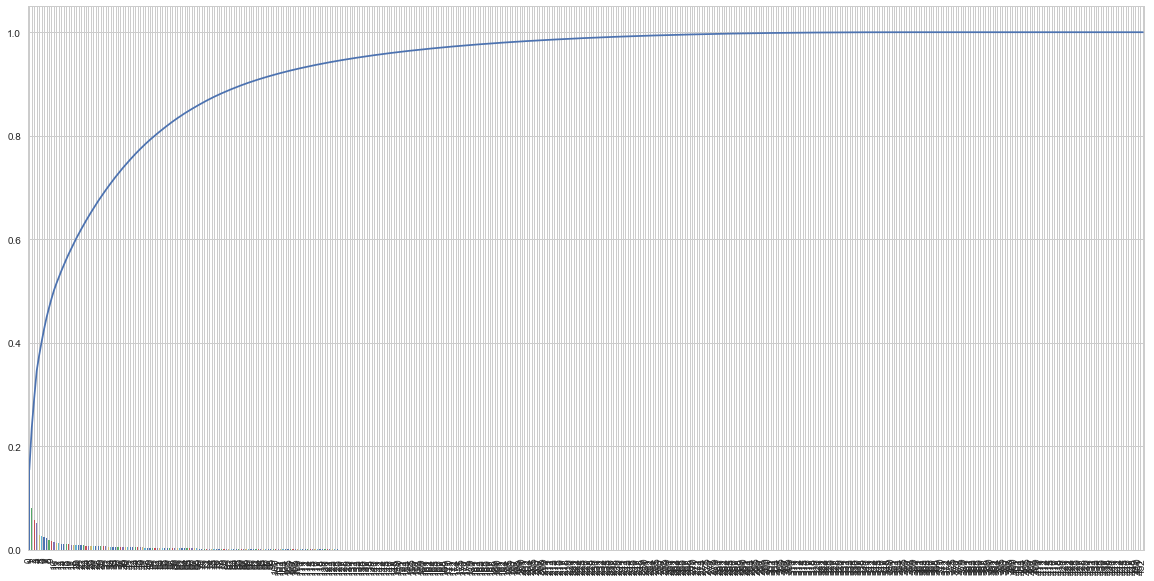

In [1230]:
plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_.cumsum())
pd.Series(pca.explained_variance_ratio_).plot(kind='bar')
plt.show()

In [1231]:
pca=PCA(n_components=150)
pca.fit(x_train)
x_train_pca=pca.transform(x_train)
x_valid_pca=pca.transform(x_valid)
test_x_pca=pca.transform(test_x)

In [1232]:
test_x.shape

(1459, 453)

In [1233]:
x_train.shapepe

(1019, 453)

In [1234]:
x_valid.shape

(437, 453)

# 算法

# XGBOOST 算法

In [1235]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [1236]:
XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [1237]:
param=[{'reg_lambda':[0.1,0.5,1,1.5],'reg_alpha':[0.1,0.3,0.6,0.8]}]
xgbt_search=GridSearchCV(cv=5,estimator=XGBRegressor(n_estimators=300,max_depth=7),n_jobs=-1,param_grid=param,scoring='neg_mean_squared_error')
xgbt_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'reg_lambda': [0.1, 0.5, 1, 1.5], 'reg_alpha': [0.1, 0.3, 0.6, 0.8]}],
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [1238]:
xgbt_search.best_params_

{'reg_alpha': 0.6, 'reg_lambda': 0.1}

In [1239]:
xgbt=xgbt_search.best_estimator_
param_range=np.arange(4,10)
train_score,valid_score=validation_curve(param_name='max_depth',param_range=param_range,estimator=xgbt,X=x_train,y=y_train,cv=3,scoring='neg_mean_squared_error',n_jobs=-1)
print(train_score.mean(axis=1))
print(valid_score.mean(axis=1))

[-0.00329046 -0.00265313 -0.00225108 -0.00184155 -0.00158597 -0.00144099]
[-0.02007926 -0.02011696 -0.02043078 -0.02096427 -0.02131094 -0.02130229]


In [1240]:
rmse_cv(xgbt_search.best_estimator_,x_train,y_train)


array([0.14482864, 0.13152183, 0.15360451, 0.15123618, 0.10889543])

In [1241]:
rmse_cv(xgbt_search.best_estimator_,x_valid,y_valid)

array([0.16339882, 0.13005365, 0.14503568, 0.14225857, 0.12915997])

In [1242]:
y_pred_xgb=np.exp(xgbt.predict(test_x))

# SVR

In [1243]:
params=[{'C':[0.1,0.4,0.8,1,1.2,1.4]}]
svr=GridSearchCV(SVR(),cv=5,scoring='neg_mean_squared_error',param_grid=params,n_jobs=-1)
svr.fit(x_train,y_train)
    

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.1, 0.4, 0.8, 1, 1.2, 1.4]}],
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [1244]:
svr.best_params_

{'C': 1.4}

[-0.01448612 -0.01342556 -0.01299806 -0.01262403 -0.01199516 -0.0117354 ]
[-0.01880922 -0.01821357 -0.01800424 -0.01781158 -0.01751632 -0.01742073]


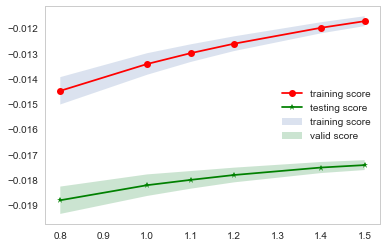

array([0.0043231 , 0.00478801, 0.00500618, 0.00518755, 0.00552117,
       0.00568533])

In [1245]:
svr_best=svr.best_estimator_
param_range=[0.8,1,1.1,1.2,1.4,1.5]
train_score,valid_score=validation_curve(param_name='C',param_range=param_range,estimator=svr_best,X=x_train,y=y_train,cv=3,scoring='neg_mean_squared_error',n_jobs=-1)
train_score_mean=train_score.mean(axis=1)
valid_score_mean=valid_score.mean(axis=1)

train_score_std=train_score.std(axis=1)
valid_score_std=train_score.std(axis=1)
print(train_score_mean)
print(valid_score_mean)
plt.figure(figsize=(6,4))
plt.grid()
plt.fill_between(param_range,train_score_mean-train_score_std,train_score_mean+train_score_std,alpha=0.2,label='training score')
plt.fill_between(param_range,valid_score_mean-valid_score_std,valid_score_mean+valid_score_std,alpha=0.3,label='valid score')

plt.plot(param_range,train_score_mean,'ro-',label='training score')
plt.plot(param_range,valid_score_mean,'g*-',label='testing score')
plt.legend()

plt.show()
train_score_mean-valid_score_mean

In [1246]:
score=[]
for i in [0.1,0.4,0.8,1,1.1,1.2,1.4,1.5]:
    print(i)
    model=SVR(C=i)
    rmse_score=rmse_cv(model,x_train,y_train)
    print(rmse_score)

0.1
[0.17578127 0.16151118 0.19470644 0.15757792 0.15005869]
0.4
[0.1523643  0.13491521 0.15885429 0.14123478 0.1237212 ]
0.8
[0.14570875 0.1299454  0.14621731 0.1375966  0.1160967 ]
1
[0.14386958 0.12861203 0.14328912 0.13710267 0.11347796]
1.1
[0.14327038 0.12815158 0.14194094 0.13692099 0.1126719 ]
1.2
[0.14261175 0.12777858 0.14081181 0.13685684 0.11206841]
1.4
[0.14170448 0.12742064 0.13909115 0.1370312  0.11116121]
1.5
[0.14139521 0.12729908 0.13838357 0.13727159 0.11062407]


In [1247]:
y_pred_svr=np.exp(svr_best.predict(test_x))

# RF 算法

In [1248]:
params=[{'max_depth':[7,9,11],'min_samples_leaf':[4,6,8]}]
rlf=GridSearchCV(estimator=RandomForestRegressor(n_estimators=300,n_jobs=-1,random_state=0),param_grid=params,scoring='neg_mean_squared_error')
rlf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [7, 9, 11], 'min_samples_leaf': [4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [1249]:
RF_best=rlf.best_estimator_
RF_best

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [1250]:
rmse_cv(RF_best,x_train,y_train)

array([0.17472535, 0.1558694 , 0.17357522, 0.16251089, 0.14347626])

In [1251]:
rmse_cv(RF_best,x_valid,y_valid)

array([0.17730255, 0.14093752, 0.18263668, 0.17026109, 0.14461076])

In [1252]:
y_pred_RF=np.exp(RF_best.predict(test_x))

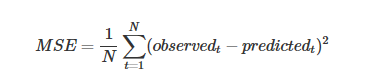

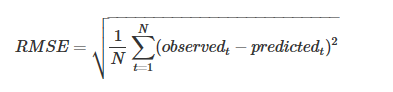

# Lasso 算法

In [1271]:
lasso=Lasso()

parames=[{'alpha':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,1.2]}]
grid_lasso=GridSearchCV(estimator=lasso,n_jobs=-1,param_grid=parames,cv=5,scoring='neg_mean_squared_error')
grid_lasso.fit(x_train,y_train)

print("ridge best alpha is:",grid_lasso.best_params_)

ridge best alpha is: {'alpha': 0.0005}


In [1272]:
lasso_best=grid_lasso.best_estimator_
rmse_cv(lasso_best,x_train,y_train)

array([0.12768556, 0.12259747, 0.12308069, 0.1445159 , 0.10139962])

In [1273]:
rmse_cv(lasso_best,x_valid,y_valid)

array([0.12629575, 0.1114359 , 0.13170444, 0.15490483, 0.10867887])

[-0.00650065 -0.00910263 -0.02533595 -0.04656499 -0.05885376 -0.15762064
 -0.15762064]
[-0.01780853 -0.01552987 -0.02703389 -0.04726641 -0.05987914 -0.15799808
 -0.15799808]


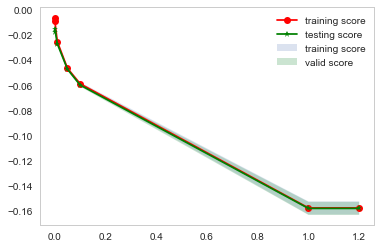

array([0.01130789, 0.00642724, 0.00169794, 0.00070143, 0.00102538,
       0.00037744, 0.00037744])

In [1274]:
lasso_best1=lasso_best
param_range=[0.0001,0.0005,0.01,0.05,0.1,1,1.2]
train_score,valid_score=validation_curve(param_name='alpha',param_range=param_range,estimator=lasso_best1,X=x_train,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
train_score_mean=train_score.mean(axis=1)
valid_score_mean=valid_score.mean(axis=1)

train_score_std=train_score.std(axis=1)
valid_score_std=train_score.std(axis=1)
print(train_score_mean)
print(valid_score_mean)
plt.figure(figsize=(6,4))
plt.grid()
plt.fill_between(param_range,train_score_mean-train_score_std,train_score_mean+train_score_std,alpha=0.2,label='training score')
plt.fill_between(param_range,valid_score_mean-valid_score_std,valid_score_mean+valid_score_std,alpha=0.3,label='valid score')

plt.plot(param_range,train_score_mean,'ro-',label='training score')
plt.plot(param_range,valid_score_mean,'g*-',label='testing score')
plt.legend()

plt.show()
train_score_mean-valid_score_mean

In [1275]:
y_pred_lasso=np.exp(lasso_best.predict(test_x))

# Ridge 算法

In [1277]:
ridge=Ridge()

parames=[{'alpha':[0.1,1,1.2,2,3,5,7,10,15,20]}]
grid_ridge=GridSearchCV(estimator=ridge,n_jobs=-1,param_grid=parames,cv=5,scoring='neg_mean_squared_error')
grid_ridge.fit(x_train,y_train)

print("ridge best alpha is:",grid_ridge.best_params_)

ridge best alpha is: {'alpha': 10}


In [1278]:
ridge_best=grid_ridge.best_estimator_
rmse_cv(ridge_best,x_valid,y_valid)

array([0.12411573, 0.1157363 , 0.12896926, 0.14622498, 0.11128338])

In [1279]:
rmse_cv(ridge_best,x_train,y_train)

array([0.12988187, 0.12636515, 0.12613935, 0.13923168, 0.10244974])

[-0.00580527 -0.00628215 -0.00637433 -0.00669809 -0.00703311 -0.00756902
 -0.00799911 -0.00852743 -0.00922434 -0.00978528]
[-0.02139617 -0.0180399  -0.01775321 -0.01700768 -0.01650749 -0.01603517
 -0.01583517 -0.015726   -0.01573444 -0.01582938]


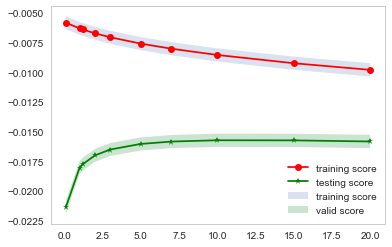

array([0.0155909 , 0.01175775, 0.01137887, 0.01030959, 0.00947439,
       0.00846615, 0.00783606, 0.00719856, 0.0065101 , 0.0060441 ])

In [1280]:
ridge_best1=ridge_best
param_range=[0.1,1,1.2,2,3,5,7,10,15,20]
train_score,valid_score=validation_curve(param_name='alpha',param_range=param_range,estimator=ridge_best1,X=x_train,y=y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
train_score_mean=train_score.mean(axis=1)
valid_score_mean=valid_score.mean(axis=1)

train_score_std=train_score.std(axis=1)
valid_score_std=train_score.std(axis=1)
print(train_score_mean)
print(valid_score_mean)
plt.figure(figsize=(6,4))
plt.grid()
plt.fill_between(param_range,train_score_mean-train_score_std,train_score_mean+train_score_std,alpha=0.2,label='training score')
plt.fill_between(param_range,valid_score_mean-valid_score_std,valid_score_mean+valid_score_std,alpha=0.3,label='valid score')

plt.plot(param_range,train_score_mean,'ro-',label='training score')
plt.plot(param_range,valid_score_mean,'g*-',label='testing score')
plt.legend()

plt.show()
train_score_mean-valid_score_mean

In [1281]:
y_pred_ridge=np.exp(ridge_best.predict(test_x))

# REsult

In [1258]:
result=pd.DataFrame(index=test.index)
result['SalePrice']=(y_pred_RF+y_pred_lasso+y_pred_svr+y_pred_xgb)/4
result.index.rename='Id'
result.to_csv(r'C:\Users\kkluc\Python Code\Kaggle\House Price Code\result120180816.csv')

In [1282]:
result=pd.DataFrame(index=test.index)
result['SalePrice']=(y_pred_lasso+y_pred_ridge)/2
result.index.rename='Id'
result.to_csv(r'C:\Users\kkluc\Python Code\Kaggle\House Price Code\result120180828.csv')